<a href="https://colab.research.google.com/github/fakhar-nadeem/Data-Science/blob/main/Assessment_DAS7005%20v1.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Import the necessary Libraries:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### **Mounting the google drive to the colab environment:**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd '/content/drive/MyDrive/Assessment Data-20250304/'

/content/drive/MyDrive/Assessment Data-20250304


In [4]:
%ls

Assessment_combined.csv                       PRSA_Data_Gucheng_20130301-20170228.csv
combined_output.csv                           PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Aotizhongxin_20130301-20170228.csv  PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv     PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv      PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv        PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv      PRSA_Data_Wanshouxigong_20130301-20170228.csv


### **Loading the Pandas dataframe:**

In [5]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
urban_df = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv")
suburban_df = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv")
rural_df = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv")
industrial_df = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")


# **Data Cleaning**

## Cleaning Urban Dataset:



### **1 - Checking Null Values:**

In [6]:
urban_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,750
PM10,553
SO2,663
NO2,1601
CO,3197


### **2 - Handling Null values:**

Cannot drop null values as they are equal to more than 5% of rows.

Cannot fill with mean or mode as the dataset is in a time series.

I am using Forward Fill as that is the most suitable in as time series dataset.

In [7]:
#Filling rows with missing values
# urban_df['PM2.5'].fillna(urban_df['PM2.5'].mean(), inplace=True)
# urban_df['PM10'].fillna(urban_df['PM10'].mean(), inplace=True)
# urban_df['SO2'].fillna(urban_df['SO2'].mean(), inplace=True)
# urban_df['NO2'].fillna(urban_df['NO2'].mean(), inplace=True)
# urban_df['CO'].fillna(urban_df['CO'].mean(), inplace=True)
# urban_df['O3'].fillna(urban_df['O3'].mean(), inplace=True)
# urban_df['TEMP'].fillna(urban_df['TEMP'].mean(), inplace=True)
# urban_df['PRES'].fillna(urban_df['PRES'].mean(), inplace=True)
# urban_df['DEWP'].fillna(urban_df['DEWP'].mean(), inplace=True)
# urban_df['RAIN'].fillna(urban_df['RAIN'].mean(), inplace=True)
# urban_df['wd'].fillna(urban_df['wd'].mode()[0], inplace=True)
# urban_df['WSPM'].fillna(urban_df['WSPM'].mean(), inplace=True)
urban_df.fillna(method='ffill', inplace=True)
urban_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [8]:
urban_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,3.0,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,300.0,60.0,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,18.0,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


### **3 - Removing Duplicates:**

In [9]:
urban_df.drop_duplicates(inplace=True)

In [10]:
urban_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,3.0,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,300.0,60.0,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,18.0,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


### **4 - Handling Outliers:**

### **5 - Correcting Data Types:**

In [11]:
print(urban_df.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [12]:
#Creating a datetime column
urban_df['datetime'] = pd.to_datetime(urban_df[['year', 'month', 'day', 'hour']])

#Dropping the individual columns
urban_df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

#Rearanging the columns
new_order = ['datetime','No',	'PM2.5',	'PM10', 'SO2',	'NO2'	,'CO',	'O3',	'TEMP',	'PRES',	'DEWP',	'RAIN',	'wd',	'WSPM',	'station'	]
urban_df = urban_df[new_order]
urban_df

,datetime,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2013-03-01 01:00:00,2,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,2013-03-01 02:00:00,3,7.0,7.0,3.0,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,2013-03-01 03:00:00,4,3.0,3.0,5.0,18.0,300.0,60.0,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,2013-03-01 04:00:00,5,3.0,3.0,7.0,18.0,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017-02-28 19:00:00,35060,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
35060,2017-02-28 20:00:00,35061,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
35061,2017-02-28 21:00:00,35062,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
35062,2017-02-28 22:00:00,35063,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


## Cleaning Suburban Dataset:



### **1 - Checking Null Values:**

In [13]:
suburban_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,913
PM10,548
SO2,1296
NO2,1365
CO,2178


### **2 - Handling Null values:**

Cannot drop null values as they are equal to more than 5% of rows.

Cannot fill with mean or mode as the dataset is in a time series.

I am using Forward Fill as that is the most suitable in as time series dataset.

In [14]:
suburban_df.fillna(method='ffill', inplace=True)
suburban_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [15]:
suburban_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,3.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,200.0,22.0,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,5.0,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
35060,35061,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
35061,35062,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi
35062,35063,2017,2,28,22,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi


### **3 - Removing Duplicates:**

In [16]:
suburban_df.drop_duplicates(inplace=True)

In [17]:
suburban_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,3.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,200.0,22.0,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,5.0,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
35060,35061,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
35061,35062,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi
35062,35063,2017,2,28,22,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi


### **4 - Handling Outliers:**

### **5 - Correcting Data Types:**

In [18]:
print(suburban_df.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [19]:
#Creating a datetime column
suburban_df['datetime'] = pd.to_datetime(suburban_df[['year', 'month', 'day', 'hour']])

#Dropping the individual columns
suburban_df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

#Rearanging the columns
new_order = ['datetime','No',	'PM2.5',	'PM10', 'SO2',	'NO2'	,'CO',	'O3',	'TEMP',	'PRES',	'DEWP',	'RAIN',	'wd',	'WSPM',	'station'	]
suburban_df = suburban_df[new_order]
suburban_df

,datetime,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013-03-01 01:00:00,2,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013-03-01 02:00:00,3,14.0,14.0,3.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013-03-01 03:00:00,4,12.0,12.0,3.0,5.0,200.0,22.0,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013-03-01 04:00:00,5,12.0,12.0,3.0,5.0,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017-02-28 19:00:00,35060,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
35060,2017-02-28 20:00:00,35061,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
35061,2017-02-28 21:00:00,35062,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi
35062,2017-02-28 22:00:00,35063,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi


## Cleaning Rural Dataset:



### **1 - Checking Null Values:**

In [20]:
rural_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,953
PM10,777
SO2,980
NO2,1639
CO,1422


### **2 - Handling Null values:**

Cannot drop null values as they are equal to more than 5% of rows.

Cannot fill with mean or mode as the dataset is in a time series.

I am using Forward Fill as that is the most suitable in as time series dataset.

In [21]:
rural_df.fillna(method='ffill', inplace=True)
rural_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [22]:
rural_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,2.0,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,3.0,2.0,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,100.0,91.0,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,2.0,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,28.0,2.0,19.0,300.0,95.0,9.9,1008.6,-14.1,0.0,WNW,1.8,Huairou
35060,35061,2017,2,28,20,21.0,34.0,4.0,24.0,500.0,80.0,9.5,1008.9,-14.4,0.0,SSW,1.3,Huairou
35061,35062,2017,2,28,21,17.0,33.0,2.0,39.0,900.0,60.0,8.4,1009.3,-14.6,0.0,SE,1.5,Huairou
35062,35063,2017,2,28,22,11.0,29.0,3.0,32.0,1400.0,69.0,8.3,1009.5,-14.7,0.0,ENE,3.2,Huairou


### **3 - Removing Duplicates:**

In [23]:
rural_df.drop_duplicates(inplace=True)

In [24]:
suburban_df

,datetime,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013-03-01 01:00:00,2,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013-03-01 02:00:00,3,14.0,14.0,3.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013-03-01 03:00:00,4,12.0,12.0,3.0,5.0,200.0,22.0,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013-03-01 04:00:00,5,12.0,12.0,3.0,5.0,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017-02-28 19:00:00,35060,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
35060,2017-02-28 20:00:00,35061,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
35061,2017-02-28 21:00:00,35062,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi
35062,2017-02-28 22:00:00,35063,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi


### **4 - Handling Outliers:**

### **5 - Correcting Data Types:**

In [25]:
print(rural_df.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [26]:
#Creating a datetime column
rural_df['datetime'] = pd.to_datetime(rural_df[['year', 'month', 'day', 'hour']])

#Dropping the individual columns
rural_df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

#Rearanging the columns
new_order = ['datetime','No',	'PM2.5',	'PM10', 'SO2',	'NO2'	,'CO',	'O3',	'TEMP',	'PRES',	'DEWP',	'RAIN',	'wd',	'WSPM',	'station'	]
rural_df = rural_df[new_order]
rural_df

,datetime,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2013-03-01 01:00:00,2,4.0,4.0,3.0,2.0,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,2013-03-01 02:00:00,3,4.0,4.0,3.0,2.0,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,2013-03-01 03:00:00,4,3.0,3.0,3.0,2.0,100.0,91.0,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,2013-03-01 04:00:00,5,3.0,3.0,7.0,2.0,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017-02-28 19:00:00,35060,16.0,28.0,2.0,19.0,300.0,95.0,9.9,1008.6,-14.1,0.0,WNW,1.8,Huairou
35060,2017-02-28 20:00:00,35061,21.0,34.0,4.0,24.0,500.0,80.0,9.5,1008.9,-14.4,0.0,SSW,1.3,Huairou
35061,2017-02-28 21:00:00,35062,17.0,33.0,2.0,39.0,900.0,60.0,8.4,1009.3,-14.6,0.0,SE,1.5,Huairou
35062,2017-02-28 22:00:00,35063,11.0,29.0,3.0,32.0,1400.0,69.0,8.3,1009.5,-14.7,0.0,ENE,3.2,Huairou


## Cleaning Industrial Dataset:



### **1 - Checking Null Values:**

In [27]:
industrial_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


### **2 - Handling Null values:**

Cannot drop null values as they are equal to more than 5% of rows.

Cannot fill with mean or mode as the dataset is in a time series.

I am using Forward Fill as that is the most suitable in as time series dataset.

In [28]:
industrial_df.fillna(method='ffill', inplace=True)
rural_df.isnull().sum()

,0
datetime,0
No,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
PRES,0


In [29]:
industrial_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
35060,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
35061,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
35062,35063,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan


### **3 - Removing Duplicates:**

In [30]:
industrial_df.drop_duplicates(inplace=True)

In [31]:
industrial_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
35060,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
35061,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
35062,35063,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan


### **4 - Handling Outliers:**

### **5 - Correcting Data Types:**

In [32]:
print(industrial_df.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [33]:
#Creating a datetime column
industrial_df['datetime'] = pd.to_datetime(industrial_df[['year', 'month', 'day', 'hour']])

#Dropping the individual columns
industrial_df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

#Rearanging the columns
new_order = ['datetime','No',	'PM2.5',	'PM10', 'SO2',	'NO2'	,'CO',	'O3',	'TEMP',	'PRES',	'DEWP',	'RAIN',	'wd',	'WSPM',	'station'	]
industrial_df = industrial_df[new_order]
industrial_df

,datetime,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2013-03-01 01:00:00,2,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,2013-03-01 02:00:00,3,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,2013-03-01 03:00:00,4,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,2013-03-01 04:00:00,5,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017-02-28 19:00:00,35060,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
35060,2017-02-28 20:00:00,35061,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
35061,2017-02-28 21:00:00,35062,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
35062,2017-02-28 22:00:00,35063,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan


## Merging all Datasets:

In [34]:
merged_df = pd.concat([urban_df, suburban_df, rural_df, industrial_df], ignore_index=True)
merged_df.to_csv("Assessment_combined.csv", index=False)
merged_df

,datetime,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2013-03-01 01:00:00,2,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,2013-03-01 02:00:00,3,7.0,7.0,3.0,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,2013-03-01 03:00:00,4,3.0,3.0,5.0,18.0,300.0,60.0,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,2013-03-01 04:00:00,5,3.0,3.0,7.0,18.0,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,2017-02-28 19:00:00,35060,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
140252,2017-02-28 20:00:00,35061,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
140253,2017-02-28 21:00:00,35062,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
140254,2017-02-28 22:00:00,35063,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan


# **Exploratory Data Analysis**

## Shape & Size:

In [46]:
#Find out how big the dataset is.
merged_df.shape

(140256, 15)

In [47]:
#shows columns in list format
merged_df.columns

Index(['datetime', 'No', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

## Preview the Data

In [48]:
#First 5 rows
print(merged_df.head())
#Last 5 rows
print(merged_df.tail())

             datetime  No  PM2.5  PM10  SO2   NO2     CO    O3  TEMP    PRES  \
0 2013-03-01 00:00:00   1    9.0   9.0  3.0  17.0  300.0  89.0  -0.5  1024.5   
1 2013-03-01 01:00:00   2    4.0   4.0  3.0  16.0  300.0  88.0  -0.7  1025.1   
2 2013-03-01 02:00:00   3    7.0   7.0  3.0  17.0  300.0  60.0  -1.2  1025.3   
3 2013-03-01 03:00:00   4    3.0   3.0  5.0  18.0  300.0  60.0  -1.4  1026.2   
4 2013-03-01 04:00:00   5    3.0   3.0  7.0  18.0  200.0  84.0  -1.9  1027.1   

   DEWP  RAIN   wd  WSPM station  
0 -21.4   0.0  NNW   5.7  Dongsi  
1 -22.1   0.0   NW   3.9  Dongsi  
2 -24.6   0.0  NNW   5.3  Dongsi  
3 -25.5   0.0    N   4.9  Dongsi  
4 -24.5   0.0  NNW   3.2  Dongsi  
                  datetime     No  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
140251 2017-02-28 19:00:00  35060   13.0  37.0  3.0  36.0  400.0  60.0  12.5   
140252 2017-02-28 20:00:00  35061   20.0  43.0  4.0  48.0  500.0  43.0  11.6   
140253 2017-02-28 21:00:00  35062   16.0  33.0  5.0  39.0  500.0  50.

In [49]:
#Checking the data types
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  140256 non-null  datetime64[ns]
 1   No        140256 non-null  int64         
 2   PM2.5     140256 non-null  float64       
 3   PM10      140256 non-null  float64       
 4   SO2       140256 non-null  float64       
 5   NO2       140256 non-null  float64       
 6   CO        140256 non-null  float64       
 7   O3        140256 non-null  float64       
 8   TEMP      140256 non-null  float64       
 9   PRES      140256 non-null  float64       
 10  DEWP      140256 non-null  float64       
 11  RAIN      140256 non-null  float64       
 12  wd        140256 non-null  object        
 13  WSPM      140256 non-null  float64       
 14  station   140256 non-null  object        
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 16.1+ MB


## Check null values in merged file:

In [58]:
#Checking if there are any null calues in the dataset
merged_df.isnull().sum()

,0
datetime,0
No,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
PRES,0


## Detecting Duplicates:

In [57]:
# Check for duplicates
print(merged_df.duplicated().sum())

0


## Summary Statistics:

In [51]:
#Basic statistics
print(merged_df.describe())

                            datetime          No          PM2.5  \
count                         140256  140256.000  140256.000000   
mean   2015-03-01 11:29:59.999999744   17532.500      79.831991   
min              2013-03-01 00:00:00       1.000       2.000000   
25%              2014-03-01 05:45:00    8766.750      20.000000   
50%              2015-03-01 11:30:00   17532.500      55.000000   
75%              2016-02-29 17:15:00   26298.250     112.000000   
max              2017-02-28 23:00:00   35064.000     941.000000   
std                              NaN   10122.141      80.658078   

                PM10            SO2            NO2             CO  \
count  140256.000000  140256.000000  140256.000000  140256.000000   
mean      103.037091      15.462931      46.689204    1209.064411   
min         2.000000       0.285600       1.026500     100.000000   
25%        34.000000       2.000000      21.000000     500.000000   
50%        80.000000       7.000000      39.000000 

## Univariate Analysis:

Univariate analysis focuses on one variable at a time.

### PM2.5 Analysis:

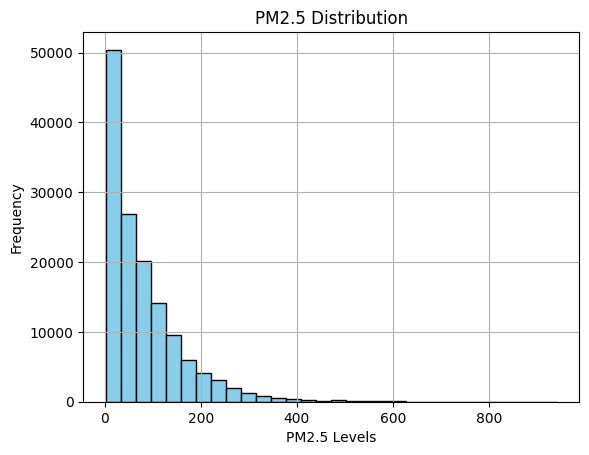

In [59]:
#Histogram shows the distribution of values.
merged_df['PM2.5'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("PM2.5 Distribution")
plt.xlabel("PM2.5 Levels")
plt.ylabel("Frequency")
plt.show()

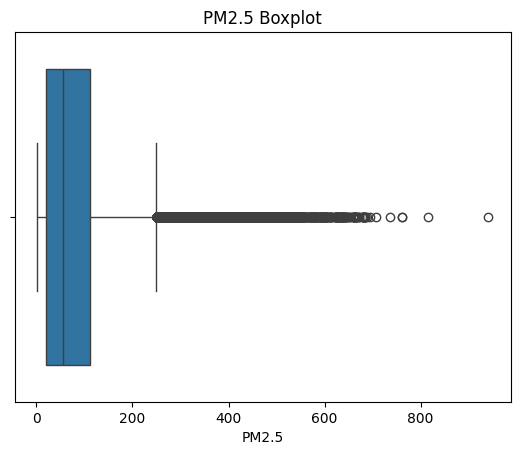

In [62]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['PM2.5'])
plt.title("PM2.5 Boxplot")
plt.show()

### PM10 Analysis:

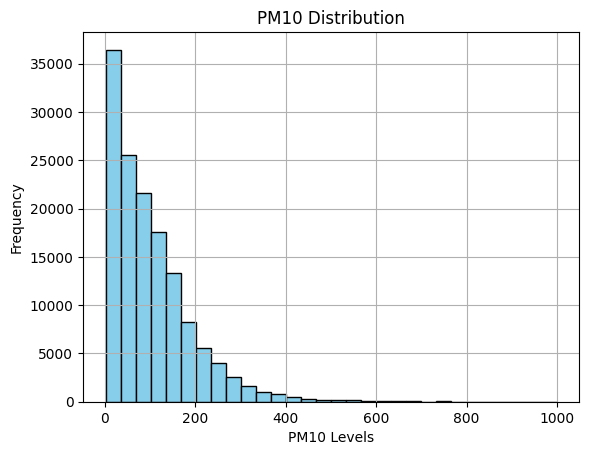

In [65]:
#Histogram shows the distribution of values.
merged_df['PM10'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("PM10 Distribution")
plt.xlabel("PM10 Levels")
plt.ylabel("Frequency")
plt.show()

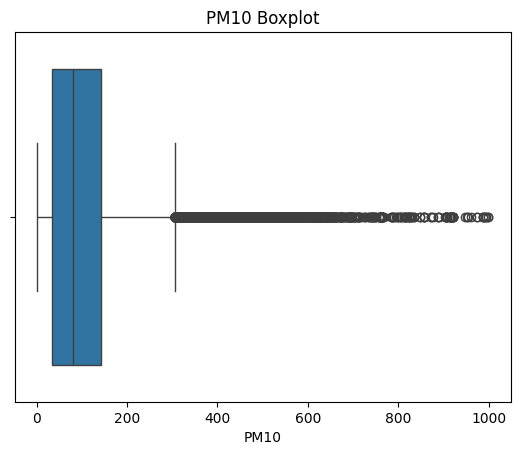

In [66]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['PM10'])
plt.title("PM10 Boxplot")
plt.show()

### SO2 Analysis:

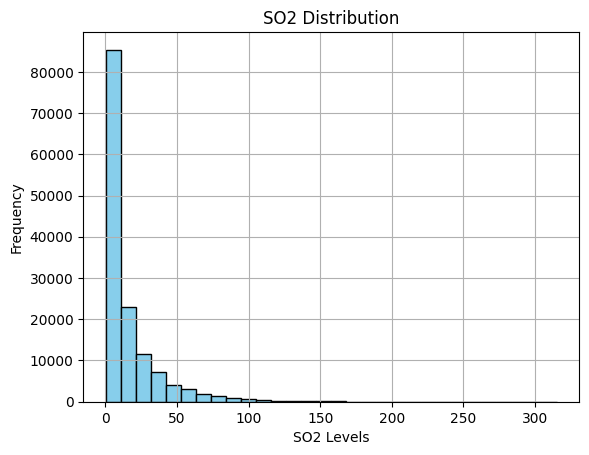

In [67]:
#Histogram shows the distribution of values.
merged_df['SO2'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("SO2 Distribution")
plt.xlabel("SO2 Levels")
plt.ylabel("Frequency")
plt.show()

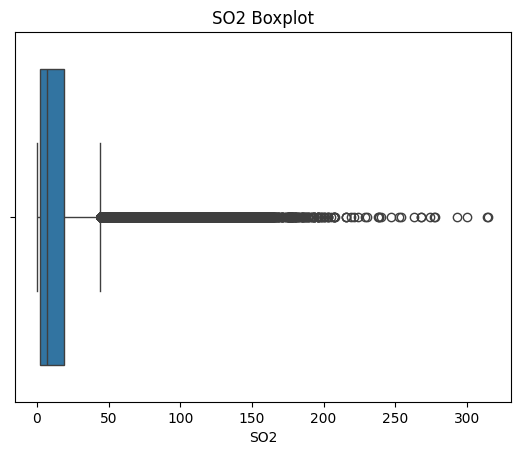

In [68]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['SO2'])
plt.title("SO2 Boxplot")
plt.show()

### NO2 Analysis:

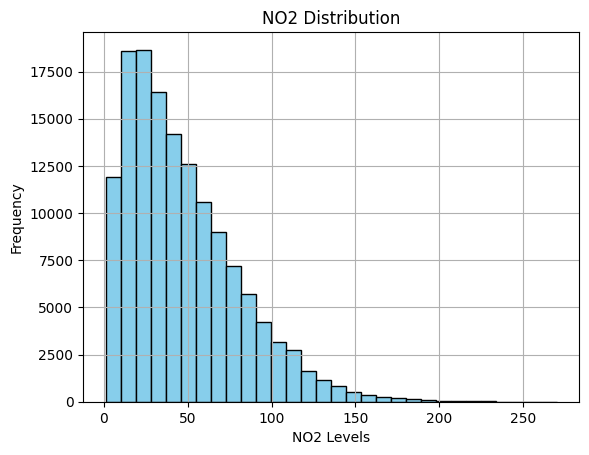

In [69]:
#Histogram shows the distribution of values.
merged_df['NO2'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("NO2 Distribution")
plt.xlabel("NO2 Levels")
plt.ylabel("Frequency")
plt.show()

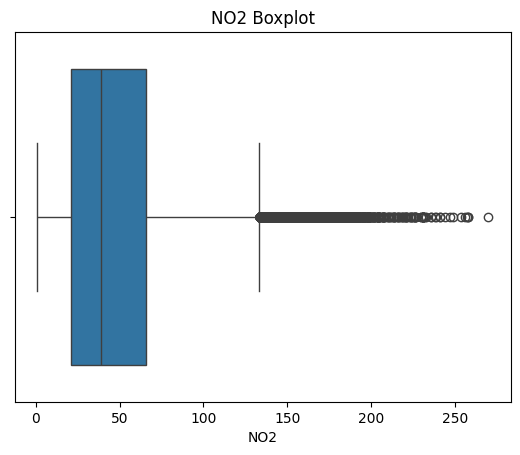

In [70]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['NO2'])
plt.title("NO2 Boxplot")
plt.show()

### CO Analysis:

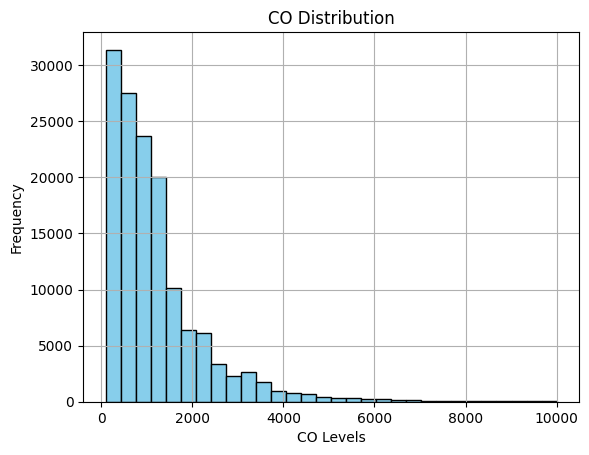

In [71]:
#Histogram shows the distribution of values.
merged_df['CO'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("CO Distribution")
plt.xlabel("CO Levels")
plt.ylabel("Frequency")
plt.show()

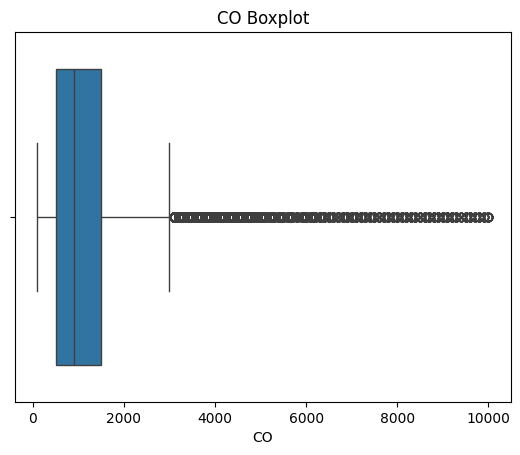

In [72]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['CO'])
plt.title("CO Boxplot")
plt.show()

### TEMP Analysis:

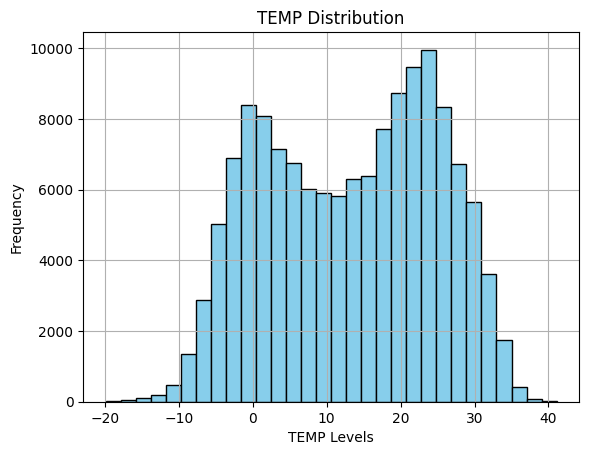

In [75]:
#Histogram shows the distribution of values.
merged_df['TEMP'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("TEMP Distribution")
plt.xlabel("TEMP Levels")
plt.ylabel("Frequency")
plt.show()

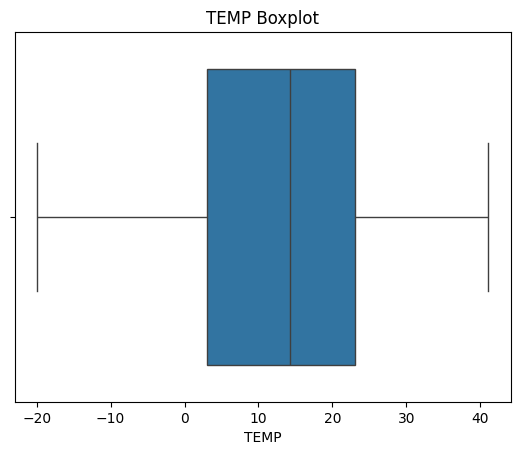

In [76]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['TEMP'])
plt.title("TEMP Boxplot")
plt.show()

### PRES Analysis:

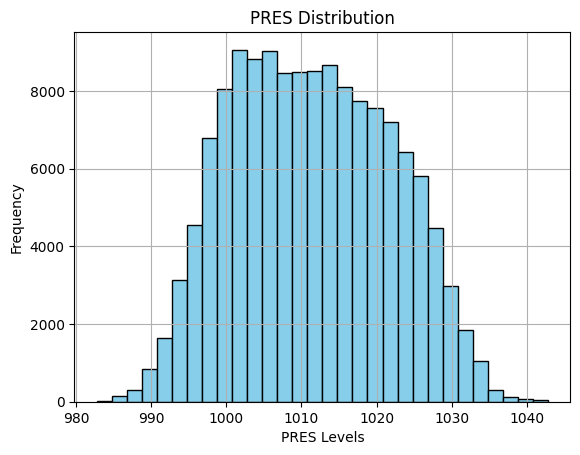

In [77]:
#Histogram shows the distribution of values.
merged_df['PRES'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("PRES Distribution")
plt.xlabel("PRES Levels")
plt.ylabel("Frequency")
plt.show()

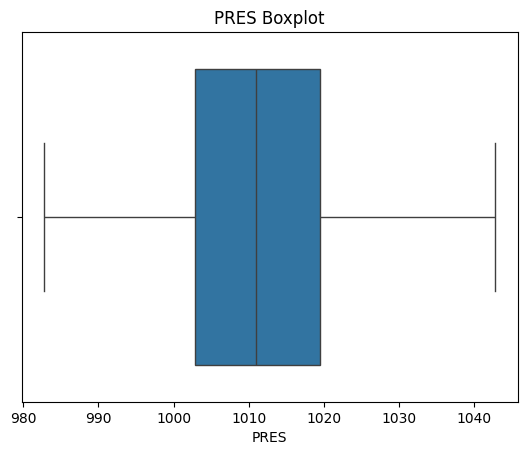

In [78]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['PRES'])
plt.title("PRES Boxplot")
plt.show()

### DEWP Analysis:

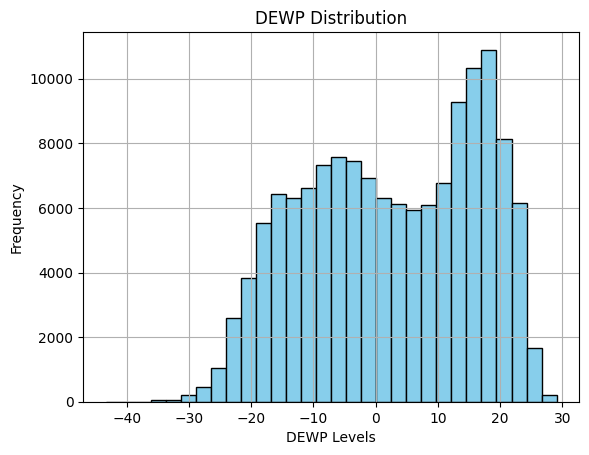

In [79]:
#Histogram shows the distribution of values.
merged_df['DEWP'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("DEWP Distribution")
plt.xlabel("DEWP Levels")
plt.ylabel("Frequency")
plt.show()

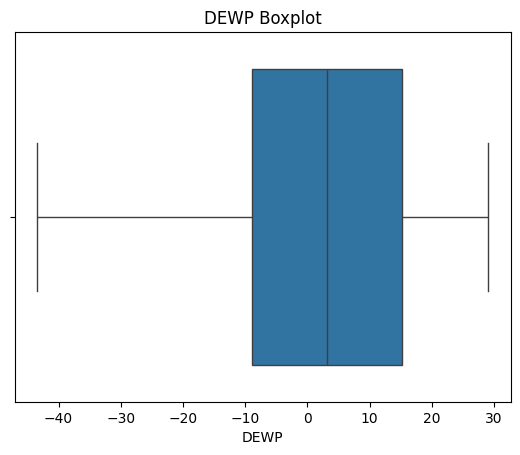

In [80]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['DEWP'])
plt.title("DEWP Boxplot")
plt.show()

### RAIN Analysis:

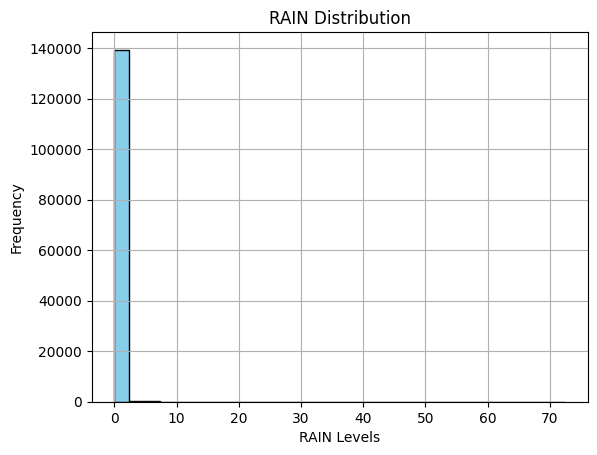

In [81]:
#Histogram shows the distribution of values.
merged_df['RAIN'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("RAIN Distribution")
plt.xlabel("RAIN Levels")
plt.ylabel("Frequency")
plt.show()

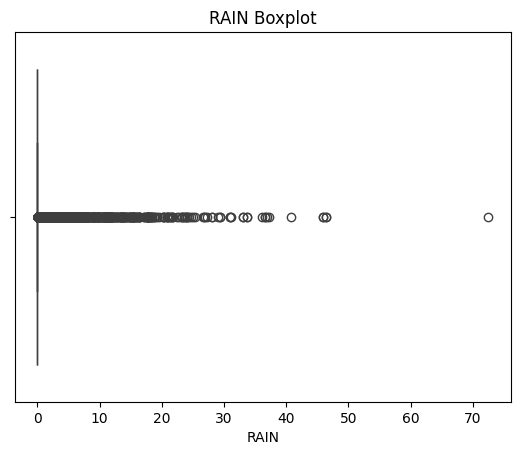

In [82]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['RAIN'])
plt.title("RAIN Boxplot")
plt.show()

### wd Analysis:

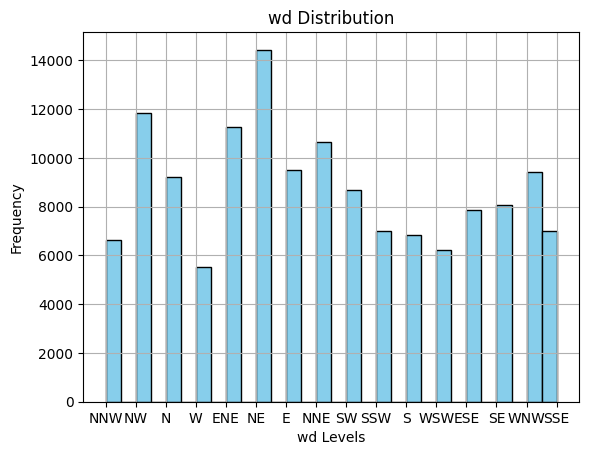

In [83]:
#Histogram shows the distribution of values.
merged_df['wd'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("wd Distribution")
plt.xlabel("wd Levels")
plt.ylabel("Frequency")
plt.show()

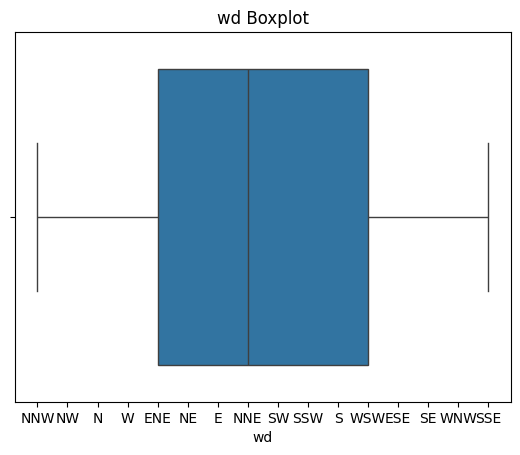

In [84]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['wd'])
plt.title("wd Boxplot")
plt.show()

### WSPM Analysis:

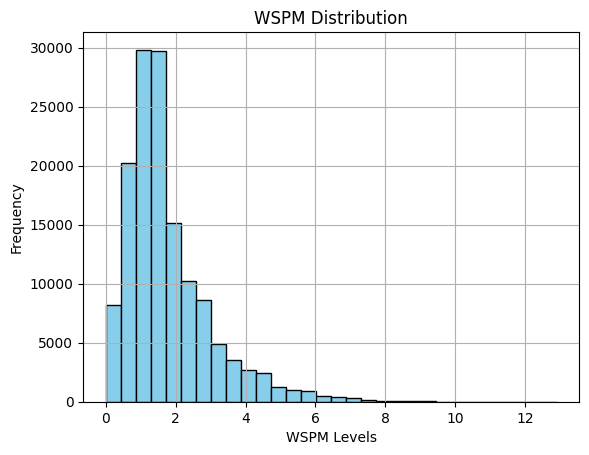

In [85]:
#Histogram shows the distribution of values.
merged_df['WSPM'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("WSPM Distribution")
plt.xlabel("WSPM Levels")
plt.ylabel("Frequency")
plt.show()

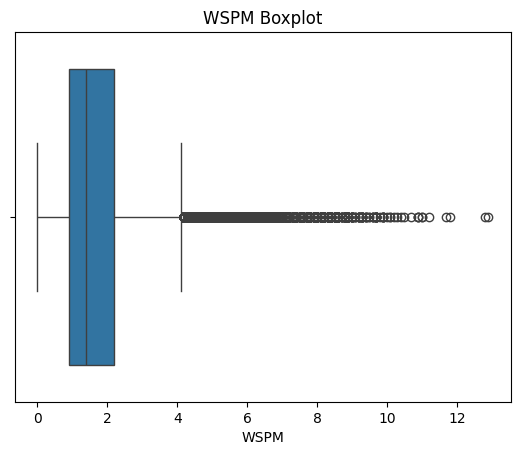

In [86]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['WSPM'])
plt.title("WSPM Boxplot")
plt.show()

### Distribution of Categorical Variables:

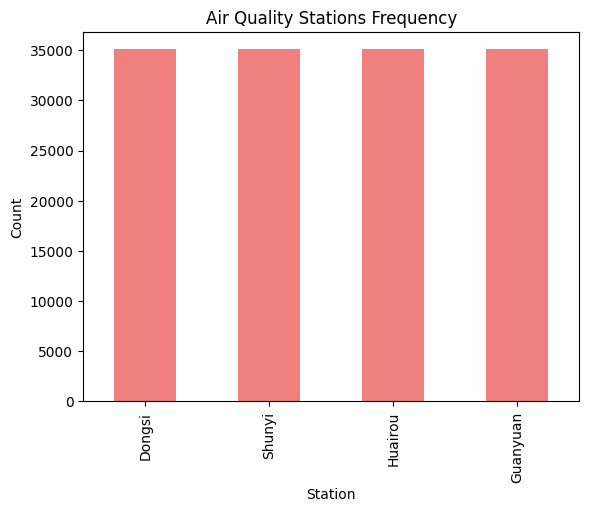

In [87]:
merged_df['station'].value_counts().plot(kind='bar', color='lightcoral')
plt.title("Air Quality Stations Frequency")
plt.xlabel("Station")
plt.ylabel("Count")
plt.show()

# **Total Number of cities in the dataset**

## **Creating New DataFrame for Air Quality Index**

In [ ]:
selected_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'TEMP','RAIN', 'CO', 'O3','year','month','day', 'station' ]

# Create a new DataFrame with only the selected columns
df1 = combined_df[selected_columns]

# Display the first few rows of the new DataFrame
df1.head()


,PM2.5,PM10,SO2,NO2,TEMP,RAIN,CO,O3,year,month,day,station
0,9.0,9.0,3.0,17.0,-0.5,0.0,300.0,89.0,2013,3,1,Dongsi
1,4.0,4.0,3.0,16.0,-0.7,0.0,300.0,88.0,2013,3,1,Dongsi
2,7.0,7.0,NaN,17.0,-1.2,0.0,300.0,60.0,2013,3,1,Dongsi
3,3.0,3.0,5.0,18.0,-1.4,0.0,NaN,NaN,2013,3,1,Dongsi
4,3.0,3.0,7.0,NaN,-1.9,0.0,200.0,84.0,2013,3,1,Dongsi


In [ ]:
# Missing values
def missing_values_table(df1):
        # Total missing values
        mis_val = df1.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df1.isnull().sum() / len(df1)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
        '% of Total Values', ascending=False)

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df1)
missing_values.style.background_gradient(cmap='Oranges')

,Missing Values,% of Total Values
CO,8550,6.095996
NO2,5264,3.753137
O3,4477,3.192020
SO2,3413,2.433407
PM2.5,3232,2.304358
PM10,2307,1.644849
RAIN,146,0.104095
TEMP,142,0.101243
year,0,0.000000
month,0,0.000000


## **Imputing missing values**

In [ ]:
df1

,PM2.5,PM10,SO2,NO2,TEMP,RAIN,CO,O3,year,month,day,station
0,9.0,9.0,3.0,17.0,-0.5,0.0,300.0,89.0,2013,3,1,Dongsi
1,4.0,4.0,3.0,16.0,-0.7,0.0,300.0,88.0,2013,3,1,Dongsi
2,7.0,7.0,NaN,17.0,-1.2,0.0,300.0,60.0,2013,3,1,Dongsi
3,3.0,3.0,5.0,18.0,-1.4,0.0,NaN,NaN,2013,3,1,Dongsi
4,3.0,3.0,7.0,NaN,-1.9,0.0,200.0,84.0,2013,3,1,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...
140251,13.0,37.0,3.0,36.0,12.5,0.0,400.0,60.0,2017,2,28,Guanyuan
140252,20.0,43.0,4.0,48.0,11.6,0.0,500.0,43.0,2017,2,28,Guanyuan
140253,16.0,33.0,5.0,39.0,10.8,0.0,500.0,50.0,2017,2,28,Guanyuan
140254,11.0,24.0,5.0,47.0,10.5,0.0,500.0,41.0,2017,2,28,Guanyuan


### **Mean/Median/Mode Imputation**
* **Mean:** Replace missing values with the mean of the column.

* **Median**: Replace missing values with the median of the column. This is useful if your data has outliers, as the median is less sensitive to them.

* **Mode:** Replace missing values with the mode (most frequent value) of the column. This is often used for categorical variables but can be applied to numerical data as well.

In [ ]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'TEMP','RAIN', 'CO', 'O3']
dff= df1.groupby(['year','month','day'])[pollutants].mean().reset_index()
dff

,year,month,day,PM2.5,PM10,SO2,NO2,TEMP,RAIN,CO,O3
0,2013,3,1,7.395833,10.812500,8.978495,20.955556,0.818750,0.0,372.043011,69.096774
1,2013,3,2,30.552083,38.747368,29.308093,54.794565,0.050000,0.0,879.734043,37.095004
2,2013,3,3,78.489583,106.656250,49.166667,76.105263,4.873958,0.0,1698.770833,22.302083
3,2013,3,4,20.439560,40.515789,18.877950,44.355410,9.142708,0.0,701.021053,56.958333
4,2013,3,5,134.075949,153.510417,69.204301,108.075269,6.409375,0.0,2044.358696,81.083333
...,...,...,...,...,...,...,...,...,...,...,...
1456,2017,2,24,24.947917,36.687500,8.427083,41.614583,4.351042,0.0,709.375000,47.656250
1457,2017,2,25,12.489583,23.645833,5.208333,32.500000,6.856250,0.0,475.000000,59.718750
1458,2017,2,26,26.875000,43.156250,9.572917,47.687500,6.305208,0.0,687.500000,45.979167
1459,2017,2,27,71.764706,101.094118,18.423529,77.588235,7.505208,0.0,1349.411765,24.882353


In [ ]:
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))
df1['AQI_Bucket']=df1['AQI_Bucket'].fillna('moderate')

KeyError: 'AQI'

In [ ]:
df1

In [ ]:
df1.describe().T

### **Subsetting columns**
Even though a lot of columns have been provided in the dataset, we shall select a few prominent ones. Let's create a new dataframe called pollutants containg the major pollutants responsible for air pollution.

In [ ]:
pollutants = ['PM2.5', 'PM10', 'Nitric','NH3', 'CO', 'SO2', 'O3', 'BTX','AQI']

In [ ]:
df1.columns

In [ ]:
df.to_csv('/content/drive/MyDrive/CMP7005/AQI_India/aqi_data.csv', index=False)

In [ ]:
df1.set_index('Date',inplace=True)
axes = df1[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:

    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

In [ ]:
import plotly.express as px

# Set Date as index
df1.set_index('Date', inplace=True)

# Create a line plot with markers for all pollutants
fig = px.scatter(df1, x=df1.index, y=df1.columns, facet_col="variable", opacity=0.5)

# Update labels
fig.update_layout(
    title="Pollutant Levels Over Time",
    xaxis_title="Years",
    yaxis_title="ug / m3",
    height=400 * len(df1.columns)  # Adjust height dynamically
)

# Show plot
fig.show()

### **Year wise plot**

In [ ]:
# Group by Year and Month to calculate the monthly average for each pollutant
monthly_avg = df1.groupby(['Year', 'month'])[pollutants].mean().reset_index()

# Create a Date column from Year and Month
monthly_avg['Date'] = pd.to_datetime(monthly_avg[['Year', 'month']].assign(DAY=1))

# Plotting the monthly average for each pollutant
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 25), sharex=False)

for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    ax.plot(monthly_avg['Date'], monthly_avg[pollutant], marker='.', linestyle='-', color='blue', alpha=0.7, label='Monthly Average')
    ax.set_ylabel(f'{pollutant} (ug/m3)')
    ax.set_title(f'{pollutant} Monthly Average Concentration Over Time')
    ax.legend()
    ax.set_xlabel('Date')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Set a common title for the figure
fig.suptitle('Monthly Average Concentrations of Pollutants Over Time', fontsize=16)

plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming df1 and pollutants are already defined
# Group by Year and Month to calculate the monthly average for each pollutant
monthly_avg = df1.groupby(['Year', 'month'])[pollutants].mean().reset_index()

# Create a Date column from Year and Month
monthly_avg['Date'] = pd.to_datetime(monthly_avg[['Year', 'month']].assign(DAY=1))

# Create subplots for each pollutant
fig = make_subplots(rows=len(pollutants), cols=1, subplot_titles=[f'{pollutant} Monthly Average Concentration Over Time' for pollutant in pollutants])

# Add traces for each pollutant
for i, pollutant in enumerate(pollutants):
    fig.add_trace(
        go.Scatter(
            x=monthly_avg['Date'],
            y=monthly_avg[pollutant],
            mode='lines+markers',
            name=pollutant,
            line=dict(color='blue', width=2),
            marker=dict(size=8),
            opacity=0.7
        ),
        row=i+1, col=1
    )

# Update layout
fig.update_layout(
    title_text='Monthly Average Concentrations of Pollutants Over Time',
    title_font_size=24,
    showlegend=False,
    height=300 * len(pollutants),  # Adjust height based on the number of pollutants
    width=1000
)

# Update y-axis labels
for i, pollutant in enumerate(pollutants):
    fig.update_yaxes(title_text=f'{pollutant} (ug/m3)', row=i+1, col=1)

# Update x-axis labels
fig.update_xaxes(title_text='Date', row=len(pollutants), col=1)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

In [ ]:
monthly_avg

### **Monthwise Plot**

In [ ]:
# Group by Month to calculate the monthly average for each pollutant
monthly_avg = df.groupby('month')[pollutants].mean()

# Plotting the monthly average for each pollutant
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 15), sharex=False)

# Define month names for x-axis labels
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    ax.plot(month_names, monthly_avg[pollutant], marker='o', linestyle='-', color='blue', alpha=0.7, label='Monthly Average')
    ax.set_ylabel(f'{pollutant} (ug/m3)')
    ax.set_title(f'{pollutant} Monthly Average Concentration')
    ax.legend()
    ax.set_xlabel('Month')  # Set x-axis label

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Set a common title for the figure
fig.suptitle('Monthly Average Concentrations of Pollutants Over Time', fontsize=16)

plt.show()

KeyError: "Columns not found: 'Nitric', 'BTX', 'NH3'"

## **Most Dominant Pollutants:**

In [ ]:
pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']
pol=df1[pollutants].mean()
pollutants_df=pol.to_frame().reset_index()
pollutants_df.columns=['Pollutant','Level']
pollutants_df

In [ ]:
plt.figure(figsize=(11,8))

labels = pollutants_df['Pollutant']
explode = [0, 0.1, 0, 0, 0, 0, 0,0]  # Exploding the first slice (PM2.5)

plt.title('Dominant Pollutants in India')
wedges, texts, autotexts = plt.pie(
    pollutants_df['Level'],
    explode=explode,
    autopct='%1.1f%%',
    shadow=True,
    startangle=0
)

plt.axis('equal')  # Ensures the pie chart is drawn as a circle

# Adding legend
plt.legend(
    wedges,
    labels,
    title="Pollutants",
    loc="center",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Setting the properties of the percentage texts
plt.setp(autotexts, size=14, weight='bold')

# Display the plot
plt.show()

## **Dominant Pollutant citywise**

In [ ]:
import pandas as pd

pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']

# Group data by 'State' and calculate the mean of each pollutant
statewise_pollution_means = df1.groupby('City')[pollutants].mean()

# Find the dominant pollutant in each state
dominant_pollutant_by_state = statewise_pollution_means.idxmax(axis=1)

# Convert the result to a DataFrame for better readability
dominant_pollutant_df = dominant_pollutant_by_state.reset_index()
dominant_pollutant_df.columns = ['City', 'Dominant Pollutant']

# Display the results
dominant_pollutant_df


## **Correlation between the different Pollutants**

In [ ]:

# Filter the DataFrame to include only numeric columns
# This assumes you want to include only the pollutants columns
pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']
numeric_pollutants_df = df1[pollutants]

# Convert data to numeric (this will handle any non-numeric values)
numeric_pollutants_df = numeric_pollutants_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values (if any)
numeric_pollutants_df = numeric_pollutants_df

# Calculate the correlation matrix
correlation_matrix = numeric_pollutants_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Pollutants')
plt.show()


NameError: name 'df1' is not defined

In [ ]:
numeric_pollutants_df.corr()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your DataFrame and it contains the pollutant columns
pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']

# Filter the DataFrame to include only the pollutant columns
pollutants_df = df1[pollutants]

# Ensure all columns are numeric
pollutants_df = pollutants_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
pollutants_df = pollutants_df.dropna()

# Create scatter plots between each pair of pollutants
# Use pairplot from seaborn to plot all pairwise scatter plots
sns.pairplot(pollutants_df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Scatter Plots of Pollutants', y=1.02)
plt.show()


## **Top 10 polluted Cities (based on Pollutants)**

Let's now look at the Indian cities which contribute to maximum pollution. We shall output the top 10 cities in each pollutant category by mean concentration of the pollutant over the years.

In [ ]:
def max_polluted_city(pollutants):
    x1 = df[[pollutants,'City']].groupby(["City"]).mean().sort_values(by=pollutants,ascending=False).reset_index()
    x1[pollutants] = round(x1[pollutants],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

In [ ]:
from IPython.display import display_html

def display_side_by_side(*args):
    # Convert each DataFrame's Styler object to HTML and join them together
    html_str = ''
    for df in args:
        html_str += df._repr_html_()  # Use _repr_html_ to get the HTML representation
    display_html(html_str.replace('table', 'table style="display:inline;margin-right:20px;"'), raw=True)

# Example usage with your top pollutant DataFrames
pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('Nitric')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
btx = max_polluted_city('BTX')
nh3=max_polluted_city('NH3')
ozone=max_polluted_city('O3')
air_qua=max_polluted_city('AQI')

# Display the DataFrames side by side
display_side_by_side(pm2_5, pm10, no2, so2, co, btx,nh3,ozone,air_qua)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with pollutant data
pollutant_columns = ['PM2.5','PM10','Nitric', 'NH3','CO', 'SO2','O3', 'BTX','AQI']

# Step 1: Group by city and calculate mean pollutant concentrations
mean_pollutant_by_city = df.groupby('City')[pollutant_columns].mean()

# Step 2: Find the top 10 cities for each pollutant
top_cities = {}
for pollutant in pollutant_columns:
    top_cities[pollutant] = mean_pollutant_by_city[pollutant].sort_values(ascending=False).head(10)

# Step 3: Plotting
fig, axes = plt.subplots(len(pollutant_columns), 1, figsize=(10, 20))

for i, pollutant in enumerate(pollutant_columns):
    axes[i].barh(top_cities[pollutant].index, top_cities[pollutant].values, color='skyblue')
    axes[i].set_title(f'Top 10 Cities by {pollutant}')
    axes[i].set_xlabel(f'{pollutant}')
    axes[i].invert_yaxis()  # Highest values on top

plt.tight_layout()
plt.show()


In [ ]:
# Define the pollutant columns
pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']

# Calculate the average levels of pollutants for each city
city_pollution = df1.groupby('City')[pollutants].mean()

import matplotlib.pyplot as plt

# Plotting the average pollutants for each city
city_pollution.plot(kind="bar",
                 figsize=(10,10),
                 stacked=True)
plt.title('Average Pollutant Levels Across Cities')
plt.xlabel('City')
plt.ylabel('Pollutant Level')
plt.show()


## **Top 10 polluted Cities (based on AQI values)**

Let's now look at the Indian cities which contribute to maximum pollution using the AQI values. We shall output the top 10 cities in each pollutant category by mean concentration of the AQI values over the years.

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the data

# Calculate the average AQI for each city
average_aqi_by_city = df.groupby('City')['AQI'].mean().reset_index()

# Sort the cities by average AQI in descending order to find the most polluted
most_polluted_cities = average_aqi_by_city.sort_values(by='AQI', ascending=False)

# Display the top 10 most polluted cities
top_10_most_polluted_cities = most_polluted_cities.head(25)
print(top_10_most_polluted_cities)


In [ ]:
import matplotlib.pyplot as plt

# Bar chart to show the average AQI of the top 10 most polluted cities
plt.figure(figsize=(12, 8))
plt.bar(top_10_most_polluted_cities['City'], top_10_most_polluted_cities['AQI'], color='blue')
plt.xlabel('Average AQI')
plt.xticks(rotation=90);
plt.ylabel('City')
plt.title('Top 10 Most Polluted Cities in India by Average AQI')
plt.show()


### **Observations:**

Here we see that Delhi has the highest AQI value among all the cities for the period of 2015-2020.
The next highest is Patna and the city with lowest AQI is Shillong.

In [ ]:
delhi_df1=df1[df1.City == 'Delhi']
patna_df1=df1[df1.City == 'Patna']
gurugram_df1=df1[df1.City == 'Gurugram']
lucknow_df1=df1[df1.City == 'Lucknow']
talcher_df1=df1[df1.City == 'Talcher']

In [ ]:
delhi_df1

In [ ]:
delhi_df1_yr=delhi_df1.groupby('Year')[selected_columns[4:13]].mean()
delhi_df1_yr

In [ ]:
patna_df1_yr=patna_df1.groupby('Year')[selected_columns[4:13]].mean()
patna_df1_yr

In [ ]:
gurugram_df1_yr=gurugram_df1.groupby('Year')[selected_columns[4:13]].mean()
gurugram_df1_yr

In [ ]:
lucknow_df1_yr=lucknow_df1.groupby('Year')[selected_columns[4:13]].mean()
lucknow_df1_yr

In [ ]:
talcher_df1_yr=talcher_df1.groupby('Year')[selected_columns[4:13]].mean()
talcher_df1_yr

In [ ]:
plt.plot(delhi_df1_yr.index,delhi_df1_yr.AQI,'D:m')
plt.plot(patna_df1_yr.index,patna_df1_yr.AQI,'s-b')
plt.plot(gurugram_df1_yr.index,gurugram_df1_yr.AQI,'o--r')
plt.plot(lucknow_df1_yr.index,lucknow_df1_yr.AQI,'+-.g')
plt.plot(talcher_df1_yr.index,talcher_df1_yr.AQI,'s:y')

plt.xlabel('Year')
plt.ylabel('Air Quality Index (AQI)')

plt.title('AQI Comparision')
plt.legend(['Delhi','Patna','Gurugram','Lucknow','Talcher']);

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the cities you're interested in
cities_ = ['Delhi', 'Patna', 'Gurugram', 'Lucknow', 'Talcher']

# Create a figure with 5 subplots (one for each city)
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easier indexing
fig.suptitle('Monthly AQI Trends for Selected Cities', fontsize=16)

for i, city in enumerate(cities_):
    city_df = df1[df1['City'] == city]

    # Group by 'Year' and 'month' and calculate the mean for AQI
    city_monthly_avg = city_df.groupby(['Year', 'month'])['AQI'].mean().reset_index()

    # Plotting the AQI trend for each city
    sns.lineplot(
        data=city_monthly_avg,
        x='month', y='AQI', hue='Year', palette='dark',
        markers=True, dashes=False, ax=axes[i]
    )
    axes[i].set_title(f'{city} Monthly AQI')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('AQI')

# Hide the last subplot if not used
if len(cities_) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust the layout to make room for the titles and labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


In [ ]:
aqi_df=df1[['AQI','AQI_Bucket']]
aqi_df

In [ ]:
aqi_df.dropna()

In [ ]:
idx=['Good','Satisfactory','Moderate','Poor','Very Poor','Severe']
aqi_bucket_df=aqi_df.AQI_Bucket.value_counts().to_frame().reindex(idx)
aqi_bucket_df.reset_index(inplace=True)
aqi_bucket_df.columns=['AQI_Bucket','Count']
aqi_bucket_df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Example DataFrame; replace with your actual DataFrames
# aqi_df is your DataFrame with 'AQI' and 'AQI_Bucket' columns
# aqi_bucket_df is your DataFrame with 'AQI_Bucket' and 'Count' columns

fig, ax = plt.subplots(1, 2, figsize=(17, 7.5), squeeze=False)

# Drawing the histogram for AQI values
sns.histplot(aqi_df, x='AQI', hue='AQI_Bucket', edgecolor=".3", linewidth=.5, log_scale=True, ax=ax[0,0])
ax[0,0].xaxis.set_major_formatter(ticker.ScalarFormatter())
ax[0,0].set_xticks([20,50,100,200,350,500])
ax[0,0].set_title("Distribution of AQI")

# Drawing the bar chart for AQI_Bucket values
sns.barplot(x='AQI_Bucket', y='Count', data=aqi_bucket_df, ax=ax[0,1])
ax[0,1].set_title('Air Quality of India')
ax[0,1].set_ylabel('Count')
ax[0,1].set_xlabel('Air Quality')

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame and contains the required columns

# List of pollutants
pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']

# Calculate the average level of each pollutant for each city
city_pollutants_df = df1.groupby('City')[pollutants].mean().reset_index()

# Melt the DataFrame to get it into long format suitable for plotting
city_pollutants_melted = city_pollutants_df.melt(id_vars='City', var_name='Pollutant', value_name='Level')

# List of cities to plot
cities = ['Delhi', 'Patna', 'Gurugram', 'Lucknow', 'Talcher']

# Filter the melted DataFrame to include only the cities of interest
city_pollutants_melted = city_pollutants_melted[city_pollutants_melted['City'].isin(cities)]


In [ ]:
import matplotlib.pyplot as plt

# Create subplots for each city
fig, axes = plt.subplots(1, len(cities), figsize=(20, 5), squeeze=False)
fig.suptitle('Dominant Pollutants in Selected Cities')

for i, city in enumerate(cities):
    # Filter the DataFrame for the current city
    city_data = city_pollutants_melted[city_pollutants_melted['City'] == city]

    # Ensure the DataFrame is not empty
    if city_data.empty:
        continue

    # Pie chart parameters
    labels = city_data['Pollutant']
    levels = city_data['Level']
    explode = [0.1] + [0] * (len(labels) - 1)  # Explode the first slice (most dominant pollutant)

    # Plotting the pie chart
    wedges, texts, autotexts = axes[0, i].pie(
        levels,
        explode=explode,
        autopct='%1.1f%%',
        shadow=True,
        startangle=0
    )

    # Setting title and properties
    axes[0, i].set_title(f'{city}')
    axes[0, i].axis('equal')  # Ensures the pie chart is drawn as a circle

    # Adding legend
    axes[0, i].legend(
        wedges,
        labels,
        title="Pollutants",
        loc="center left",
        bbox_to_anchor=(1.1, 0, 0.5, 1)
    )

    # Setting the properties of the percentage texts
    plt.setp(autotexts, size=12, weight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust layout to make room for the suptitle

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define lockdown period (you may need to adjust these dates based on your specific lockdown dates)
lockdown_start = '2020-03-25'  # Example lockdown start date
lockdown_end = '2020-05-31'    # Example lockdown end date

# Convert date columns to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for lockdown period
lockdown_data = df[(df['Date'] >= lockdown_start) & (df['Date'] <= lockdown_end)]

# Filter data for pre-lockdown period
pre_lockdown_data = df[df['Date'] < lockdown_start]

# Define pollutants
pollutants = ['PM2.5', 'PM10', 'Nitric', 'NH3', 'CO', 'SO2', 'O3', 'BTX']

# Calculate average levels of each pollutant during lockdown
lockdown_avg = lockdown_data[pollutants].mean().reset_index()
lockdown_avg.columns = ['Pollutant', 'Lockdown_Level']

# Calculate average levels of each pollutant before lockdown
pre_lockdown_avg = pre_lockdown_data[pollutants].mean().reset_index()
pre_lockdown_avg.columns = ['Pollutant', 'Pre_Lockdown_Level']

# Merge the two DataFrames
comparison_df = pd.merge(pre_lockdown_avg, lockdown_avg, on='Pollutant')

# Plot the comparison
plt.figure(figsize=(12, 8))

# Melt the DataFrame for easier plotting with seaborn
melted_df = comparison_df.melt(id_vars='Pollutant', var_name='Period', value_name='Level')

# Plot
sns.barplot(x='Pollutant', y='Level', hue='Period', data=melted_df, palette='coolwarm')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Effect of Lockdown on Levels of Individual Pollutants')
plt.xlabel('Pollutant')
plt.ylabel('Average Level')
plt.legend(title='Period')
plt.tight_layout()

plt.show()
